In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_01_02 = pd.read_csv('data/2001_2002_DATA.csv', encoding = 'cp949')
df_03_04 = pd.read_csv('data/2003_2004_DATA.csv', encoding = 'cp949')
df_05_06 = pd.read_csv('data/2005_2006_DATA.csv', encoding = 'cp949')
df_07_08 = pd.read_csv('data/2007_2008_DATA.csv', encoding = 'cp949')
df_09_10 = pd.read_csv('data/2009_2010_DATA.csv', encoding = 'cp949')
df_11_12 = pd.read_csv('data/2011_2012_DATA.csv', encoding = 'cp949')
df_13_14 = pd.read_csv('data/2013_2014_DATA.csv', encoding = 'cp949')
df_15_16 = pd.read_csv('data/2015_2016_DATA.csv', encoding = 'cp949')
df_17_18 = pd.read_csv('data/2017_2018_DATA.csv', encoding = 'cp949')
df_19_20 = pd.read_csv('data/2019_2020_DATA.csv', encoding = 'cp949')
df_21_22 = pd.read_csv('data/2021_2022_DATA.csv', encoding = 'cp949')
df_23 = pd.read_csv('data/2023_DATA.csv', encoding = 'cp949')

In [3]:
df = pd.concat([df_01_02,df_03_04,df_05_06,df_07_08,df_09_10,
                       df_11_12,df_13_14,df_15_16,df_17_18,df_19_20,
                       df_21_22,df_23])

In [4]:
df = df.rename(columns = {'지점명':'지역', '일시':'기간','평균기온(°C)':'기온'})
df['기간'] = pd.to_datetime(df['기간'])
df['년도'] = df['기간'].dt.year
df['월'] = df['기간'].dt.month
df_weather = df[['년도','월','지역','기온']]
df_weather

,년도,월,지역,기온
0,2001,1,수원,-4.0
1,2001,2,수원,-0.6
2,2001,3,수원,4.2
3,2001,4,수원,12.1
4,2001,5,수원,18.1
...,...,...,...,...
6,2023,7,수원,25.9
7,2023,8,수원,26.7
8,2023,9,수원,23.1
9,2023,10,수원,14.9


C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


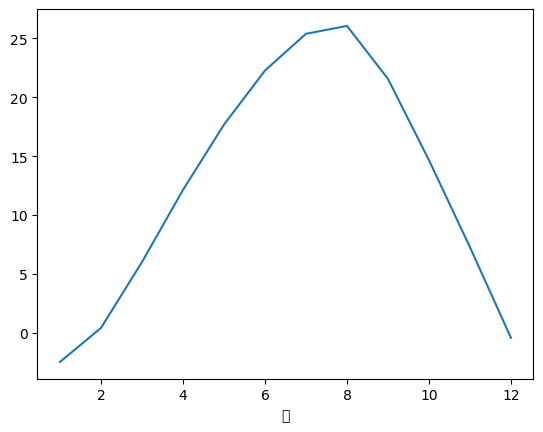

In [5]:
g = df.groupby(['월'])["기온"]
g_avg = g.sum() / g.count()
g_avg.plot()
plt.show()

In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

test_year = (df_weather["년도"] >= 2022)
past_year = (df_weather["년도"] <= 2021)
interval = 3

def make_data(data, feature_column="기온"):
    x = []
    y = []
    temps = list(data[feature_column])
    for i in range(len(temps)):
        if i <= interval:
            continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return x, y

past_x, past_y = make_data(df_weather[past_year])
test_x, test_y = make_data(df_weather[test_year])

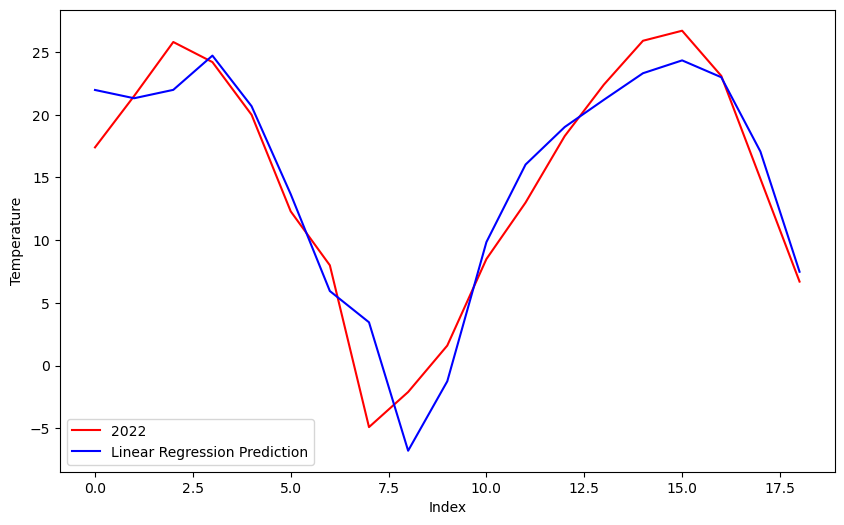

In [39]:
lr = LinearRegression()
lr.fit(past_x, past_y)
pre = lr.predict(test_x)

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, color='r', label='2022')
plt.plot(pre, color='b', label='Linear Regression Prediction')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()